In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

/home/mwagner/bin/anaconda3/envs/hcprediction/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
outputs = torch.load(
    "../Elman_SGD/predloss/learned-noise/cyclic-shift-07162025.pth.tar"
)

In [14]:
baseline = torch.load(
    "../Elman_SGD/predloss/noise/cyclic-shift-structure-1.0-07152025.pth.tar"
)

In [3]:
outputs.keys()

dict_keys(['initial_state_dict', 'final_state_dict', 'y_hat', 'X_mini', 'Target_mini', 'hidden', 'loss', 'noise_stats', 'weights', 'grad_history'])

In [4]:
outputs["noise_stats"].keys()

dict_keys(['noise_std', 'noise_scale', 'spectral_norm'])

In [5]:
outputs["grad_history"].keys()

dict_keys(['noise', 'noise_scale', 'input_linear.weight', 'input_linear.bias', 'linear3.weight', 'linear3.bias'])

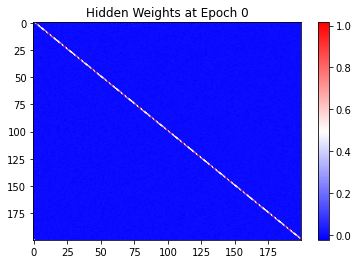

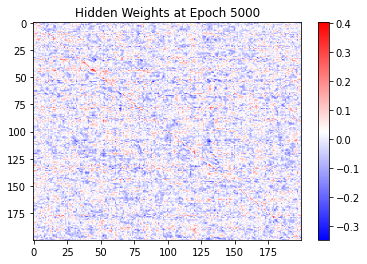

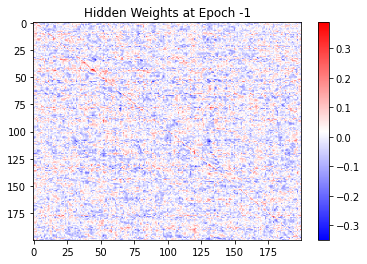

In [6]:
for i in [0, len(outputs["weights"]) // 2, -1]:  # first, middle, last
    plt.imshow(outputs["weights"][i], cmap="bwr", aspect="auto")
    plt.title(f"Hidden Weights at Epoch {i}")
    plt.colorbar()
    plt.show()

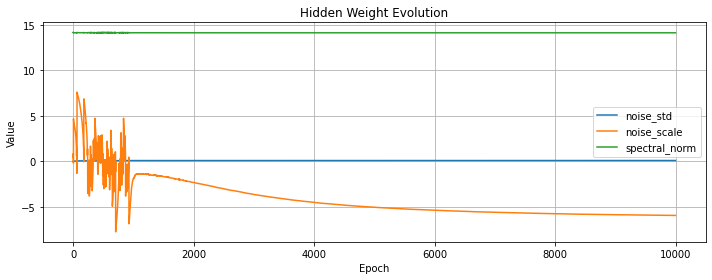

In [7]:
# Plot evolution
plt.figure(figsize=(10, 4))
for k in outputs["noise_stats"]:
    plt.plot(outputs["noise_stats"][k], label=k)
plt.legend()
plt.title("Hidden Weight Evolution")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

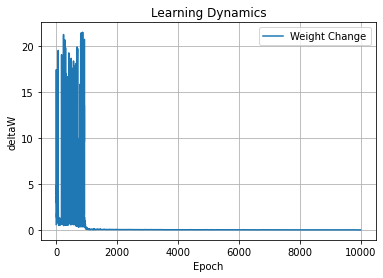

In [8]:
weight_changes = []
for i in range(1, len(outputs["weights"])):
    delta = (outputs["weights"][i] - outputs["weights"][i - 1]).norm().item()
    weight_changes.append(delta)

plt.plot(weight_changes, label="Weight Change")
# plt.plot(grad_norms, label="Grad Norm")
plt.xlabel("Epoch")
plt.ylabel("deltaW")
plt.title("Learning Dynamics")
plt.legend()
plt.grid(True)
plt.show()

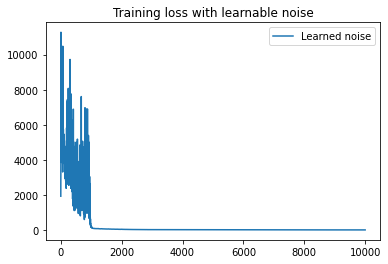

In [ ]:
# loss plots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plt.plot(outputs["loss"], label="Learned noise")
plt.title("Training loss with learnable noise")
plt.legend()
plt.show()

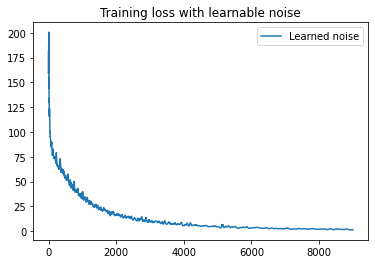

In [13]:
plt.plot(outputs["loss"][1000:], label="Learned noise")
plt.title("Training loss with learnable noise")
plt.legend()
plt.show()

In [10]:
# Frobenius Norm-Based Decomposition
hidden_dim = 200
off_diag_val = 1
W_shift = torch.zeros(hidden_dim, hidden_dim)
idx = torch.arange(hidden_dim - 1)
W_shift[idx, idx + 1] = off_diag_val
W_shift[-1, 0] = off_diag_val